In [3]:
import pandas as pd

In [4]:
from tqdm import tqdm
import re

In [5]:
cricket_data = pd.read_excel('Cricket.xlsx')
restaurant_data = pd.read_excel('Restaurant.xlsx')

In [6]:
# Remove duplicate rows
cricket_data = cricket_data.drop_duplicates(subset=['Text'], keep='first')

In [7]:
# Remove duplicate rows
restaurant_data = restaurant_data.drop_duplicates(subset=['Text'], keep='first')

In [8]:
cricket_data['Polarity'].value_counts()

negative    1978
positive     505
neutral      237
Name: Polarity, dtype: int64

In [9]:
restaurant_data['Polarity'].value_counts()

positive    992
negative    386
neutral     236
conflict    100
Name: Polarity, dtype: int64

In [10]:
cricket_data = cricket_data[['Text', 'Polarity']]

In [11]:
restaurant_data = restaurant_data[['Text', 'Polarity']]

In [12]:
final_df = restaurant_data.append(cricket_data, ignore_index = True)

In [13]:
final_df

,Text,Polarity
0,"স্টাফ কিন্তু, আমাদের জন্য ভয়ঙ্কর ছিল।",negative
1,"শুধুমাত্র,রিডামিং ফ্যাক্টর খাদ্য ছিল,পুরোপুরি ...",positive
2,"খাবার একদমই ব্যতিক্রমী, একটি খুব সক্ষম রান্নাঘ...",positive
3,যেখানে গাব্রিয়েলা লোকালি আপনাকে শুভেচ্ছা জানা...,positive
4,"একবার গিয়ে এটি উপভোগ করবেন না, আমি বলতে পারেন ...",positive
...,...,...
4429,"এরা সব বেহায়া,আর মানুষিক বৈকল্য ধারী । না হলে ...",negative
4430,নির্বাচকমণ্ডলী দের গালে জুতা মারা উচিত.. হালা...,negative
4431,"বস ভাল করবে ইটাই আশা করি,দারুন এরজন ব্যাটিং অল...",negative
4432,গুগল সার্চ করে মিনহাজের রানরেট দেখে নিন? এভারে...,negative


# EDA

In [14]:
df = final_df

In [15]:
df.shape

(4434, 2)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4434 entries, 0 to 4433
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      4434 non-null   object
 1   Polarity  4434 non-null   object
dtypes: object(2)
memory usage: 69.4+ KB


In [17]:
df.describe()

,Text,Polarity
count,4434,4434
unique,4434,4
top,"স্টাফ কিন্তু, আমাদের জন্য ভয়ঙ্কর ছিল।",negative
freq,1,2364


In [18]:
df.isnull().sum()

Text        0
Polarity    0
dtype: int64

negative    2364
positive    1497
neutral      473
conflict     100
Name: Polarity, dtype: int64


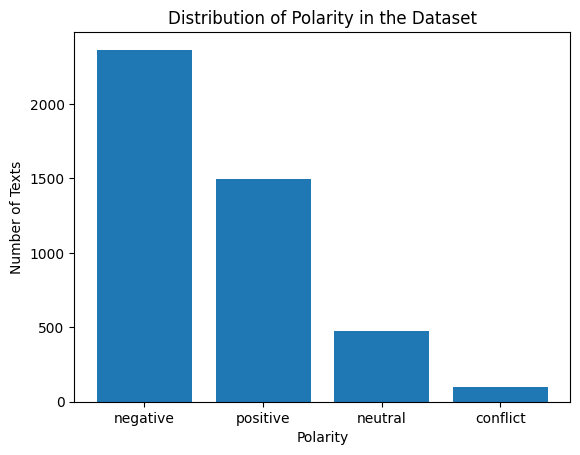

In [19]:
# Count the number of each polarity
print(df['Polarity'].value_counts())

# Plot the distribution of polarity
import matplotlib.pyplot as plt

plt.bar(df['Polarity'].value_counts().index, df['Polarity'].value_counts().values)
plt.xlabel('Polarity')
plt.ylabel('Number of Texts')
plt.title('Distribution of Polarity in the Dataset')
plt.show()


In [20]:
def clean_sentence(sent):

    sent = re.sub('[?.`*^()!°¢܌…Ͱ̰ߒנ~×Ҡߘ:ҰߑÍ|।;!,&%\'@#$><A-Za-z0+-9=./''""_০-৯]', '', sent)
    sent = re.sub(r'(\W)(?=\1)', '', sent)
    sent = re.sub(r'https?:\/\/.*[\r\n]*', '', sent, flags=re.MULTILINE)
    sent = re.sub(r'\<a href', ' ', sent)
    sent = re.sub(r'&amp;', '', sent) 
    sent = re.sub(r'<br />', ' ', sent)
    sent = re.sub(r'\'', ' ', sent)
    sent = re.sub(r'ߑͰߑ̰ߒנ', '', sent)
    sent = re.sub(r'ߎɰߎɰߎɍ', '', sent)
    
    sent = sent.strip()
    return sent

In [21]:
df['clean_sentence'] = df['Text'].map(clean_sentence)

In [22]:
def remove_stop_words(text):
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text

In [23]:
def tokenized_data(sent):
    tokenized_text = sent.split()
    return tokenized_text

In [24]:
stop_words = {'এ', 'হয়', 'কি', 'কী', 'এর', 'কে', 'যে', 'এই', 'বা', 'সব', 'টি', 'তা',
       'সে', 'তাই', 'সেই', 'তার', 'আগে', 'যদি', 'আছে', 'আমি', 'এবং', 'করে', 'কার', 'এটি', 'হতে', 'যায়',
       'আরও', 'যাক', 'খুব', 'উপর', 'পরে', 'হবে', 'কেন', 'কখন', 'সকল', 'হয়', 'ঠিক', 'একই', 'কোন',
       'ছিল', 'খুবই', 'কোনো', 'অধীন', 'যারা', 'তারা', 'গুলি', 'তাকে', 'সেটা', 'সময়', 'আমার', 'আমরা', 'সবার',
       'উভয়', 'একটা', 'আপনি', 'নিয়ে', 'একটি', 'বন্ধ', 'জন্য', 'শুধু', 'যেটা', 'উচিত', 'মাঝে', 'থেকে', 'করবে',
       'আবার', 'উপরে', 'সেটি', 'কিছু', 'কারণ', 'যেমন', 'তিনি', 'মধ্যে', 'আমাকে', 'করছেন', 'তুলনা', 'তারপর',
       'নিজেই', 'থাকার', 'নিজের', 'পারেন', 'একবার', 'সঙ্গে', 'ইচ্ছা', 'নীচের', 'এগুলো', 'আপনার', 'অধীনে', 'কিংবা',
       'এখানে', 'তাহলে', 'কয়েক', 'জন্যে', 'হচ্ছে', 'তাদের', 'কোথায়', 'কিন্তু', 'নিজেকে', 'যতক্ষণ', 'আমাদের',
       'দ্বারা', 'হয়েছে', ' সঙ্গে', 'সেখানে', 'কিভাবে', 'মাধ্যমে', 'নিজেদের', 'তুলনায়', 'প্রতিটি',
       'তাদেরকে', 'ইত্যাদি', 'সম্পর্কে', 'সর্বাধিক', 'বিরুদ্ধে', 'অন্যান্য'}


In [25]:
df['clean_data'] = [remove_stop_words(tokenized_data(sent)) for sent in df['clean_sentence'].tolist()]
#del df['sentence']
# df.to_csv('sentiment_analysis_clean_data.csv', encoding='utf-8', index=False)

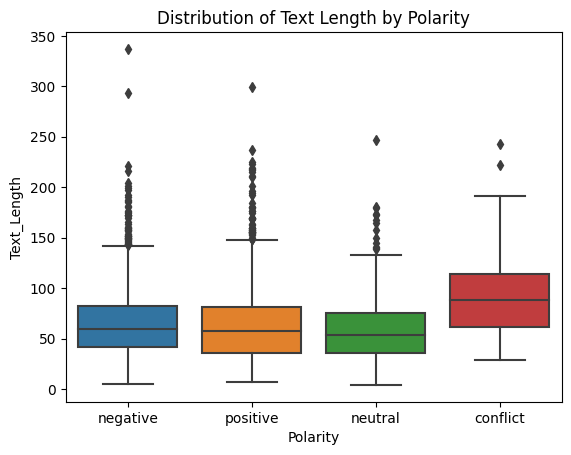

In [26]:
# Add a new column for text length
df['Text_Length'] = df['Text'].apply(len)

# Plot the distribution of text length for each polarity
import seaborn as sns

sns.boxplot(x='Polarity', y='Text_Length', data=df)
plt.title('Distribution of Text Length by Polarity')
plt.show()


In [27]:
from collections import Counter

# Tokenize the text
df['Tokens'] = df['Text'].apply(lambda x: x.split())

# Separate tokens by polarity
positive_tokens = df[df['Polarity'] == 'positive']['Tokens'].explode()
negative_tokens = df[df['Polarity'] == 'negative']['Tokens'].explode()
neutral_tokens = df[df['Polarity'] == 'neutral']['Tokens'].explode()
conflict_tokens = df[df['Polarity'] == 'conflict']['Tokens'].explode()

# Get the most common words in each polarity
common_positive_words = Counter(positive_tokens).most_common(10)
common_negative_words = Counter(negative_tokens).most_common(10)
common_neutral_words = Counter(neutral_tokens).most_common(10)
common_conflict_words = Counter(conflict_tokens).most_common(10)

# Print the results
print('Most Common Positive Words:', common_positive_words)
print('Most Common Negative Words:', common_negative_words)
print('Most Common Positive Words:', common_neutral_words)
print('Most Common Negative Words:', common_conflict_words)

Most Common Positive Words: [('এবং', 430), ('একটি', 273), ('আমি', 210), ('জন্য', 193), ('ভাল', 181), ('।', 147), ('এই', 130), ('ছিল', 129), ('এটি', 125), ('আমার', 120)]
Most Common Negative Words: [('না', 317), ('এই', 215), ('আর', 196), ('কি', 182), ('করে', 181), ('জন্য', 164), ('বাংলাদেশ', 159), ('আমাদের', 149), ('এবং', 140), ('আমরা', 134)]
Most Common Positive Words: [('আমি', 95), ('এবং', 59), ('আমরা', 48), ('জন্য', 47), ('একটি', 47), ('এই', 41), ('আমার', 39), ('।', 35), ('না', 31), ('করে', 27)]
Most Common Negative Words: [('কিন্তু', 37), ('এবং', 34), ('আমি', 30), ('একটি', 29), ('ছিল', 28), ('এটি', 26), ('জন্য', 24), ('ভাল', 20), ('কখনও', 14), ('খুব', 14)]


In [28]:
from matplotlib.font_manager import FontProperties
bengali_font = FontProperties(fname='Lohit-Bengali.ttf')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


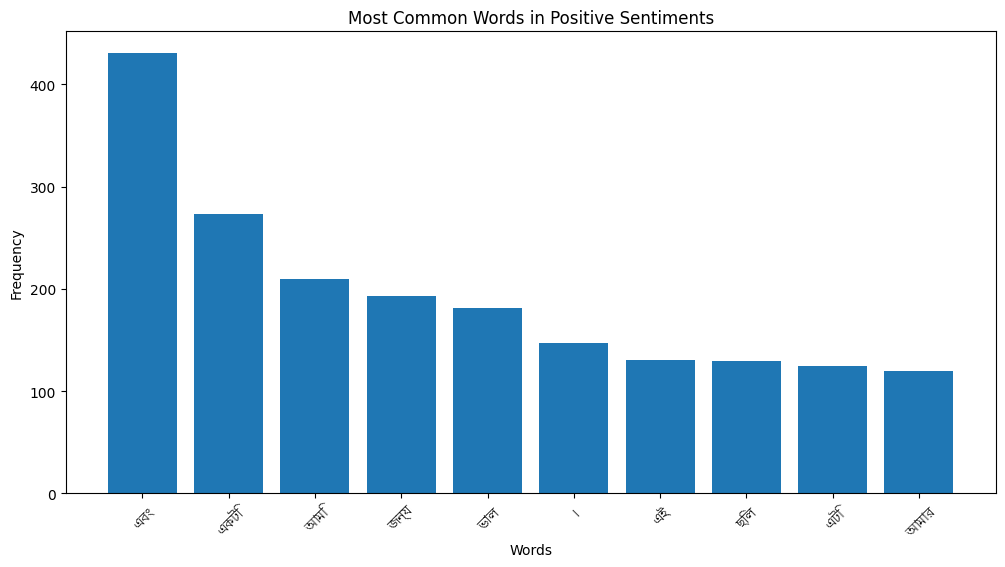

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


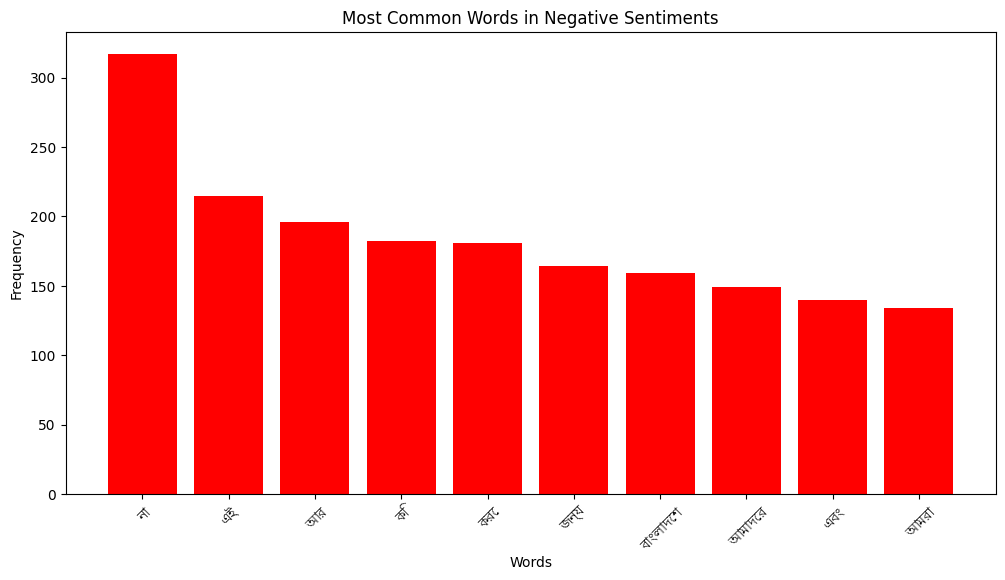

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


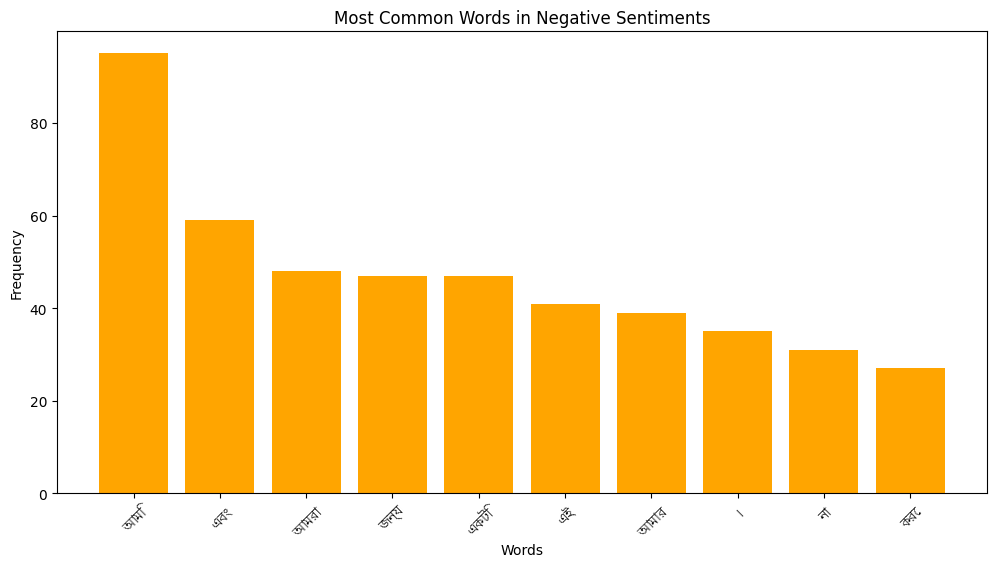

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


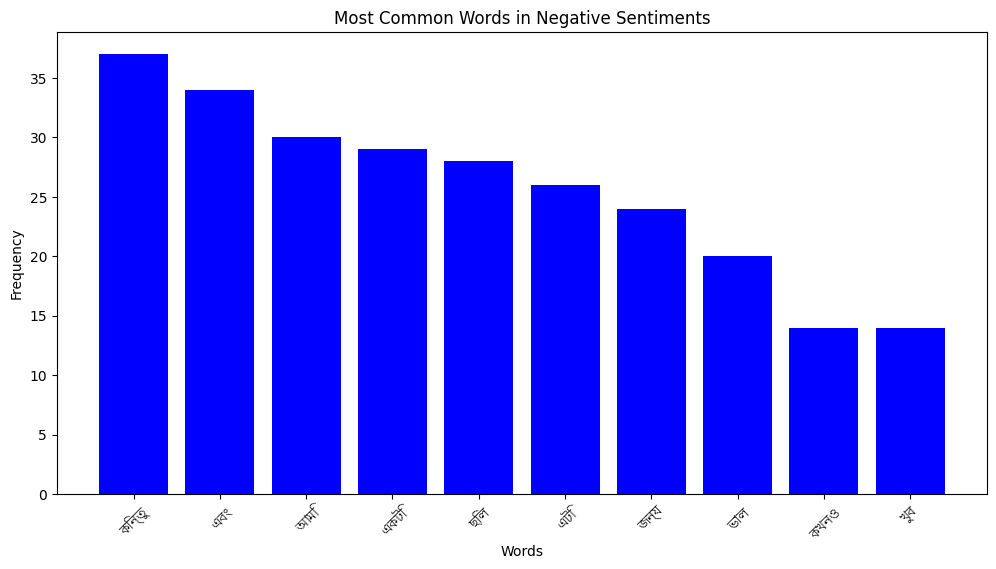

In [29]:
import matplotlib.pyplot as plt

# Plot common words for positive sentiment
plt.figure(figsize=(12, 6))
positive_words, positive_counts = zip(*common_positive_words)
plt.bar(positive_words, positive_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Positive Sentiments')
plt.xticks(rotation=45, fontproperties=bengali_font)
plt.show()

# Plot common words for negative sentiment
plt.figure(figsize=(12, 6))
negative_words, negative_counts = zip(*common_negative_words)
plt.bar(negative_words, negative_counts, color='red')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Negative Sentiments')
plt.xticks(rotation=45, fontproperties=bengali_font)
plt.show()


# Plot common words for negative sentiment
plt.figure(figsize=(12, 6))
negative_words, negative_counts = zip(*common_neutral_words)
plt.bar(negative_words, negative_counts, color='orange')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Negative Sentiments')
plt.xticks(rotation=45, fontproperties=bengali_font)
plt.show()


# Plot common words for negative sentiment
plt.figure(figsize=(12, 6))
negative_words, negative_counts = zip(*common_conflict_words)
plt.bar(negative_words, negative_counts, color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Negative Sentiments')
plt.xticks(rotation=45, fontproperties=bengali_font)
plt.show()


In [30]:
regex = r"[\u0980-\u09FF]+"

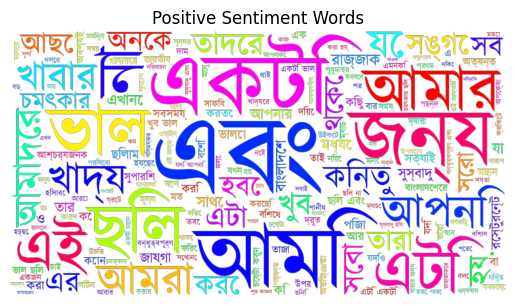

In [31]:
from wordcloud import WordCloud

# Generate word cloud for positive sentiment
positive_text = ' '.join(positive_tokens)
wordcloud = WordCloud(width=1500, height=800, mode="RGBA",background_color=None, colormap="hsv",
                font_path="kalpurush.ttf", regexp=regex).generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Positive Sentiment Words')
plt.show()


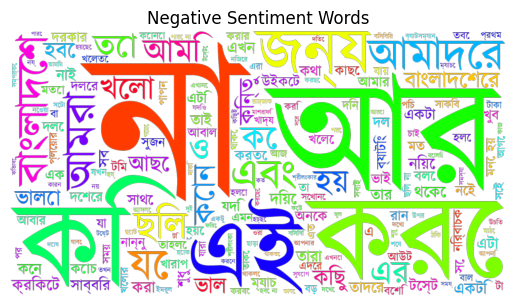

In [32]:
# Generate word cloud for negative sentiment
negative_text = ' '.join(negative_tokens)
wordcloud = WordCloud(width=1500, height=800, mode="RGBA",background_color=None, colormap="hsv",
               font_path="kalpurush.ttf", regexp=regex).generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Negative Sentiment Words')
plt.show()

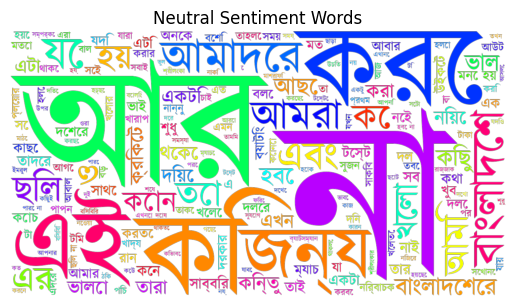

In [33]:
# Generate word cloud for Neutral sentiment
neutral_text = ' '.join(neutral_tokens)
wordcloud = WordCloud(width=1500, height=800, mode="RGBA",background_color=None, colormap="hsv",
               font_path="kalpurush.ttf", regexp=regex).generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Neutral Sentiment Words')
plt.show()

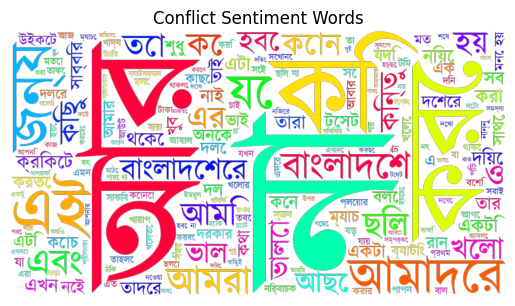

In [34]:
# Generate word cloud for Conflict sentiment
conflict_text = ' '.join(conflict_tokens)
wordcloud = WordCloud(width=1500, height=800, mode="RGBA",background_color=None, colormap="hsv",
               font_path="kalpurush.ttf", regexp=regex).generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Conflict Sentiment Words')
plt.show()

# Modelling

In [58]:
data = final_df

In [59]:
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

In [60]:
from transformers import GPT2Tokenizer

In [61]:
tokenizer = GPT2Tokenizer.from_pretrained("saiful9379/Bangla_GPT2")

# Set the padding token to be the same as the EOS token
tokenizer.padding_token = tokenizer.eos_token

In [62]:
# Tokenize the text data
train_encodings = tokenizer(list(train_data['Text']), truncation=True, padding=True)
val_encodings = tokenizer(list(val_data['Text']), truncation=True, padding=True)
test_encodings = tokenizer(list(test_data['Text']), truncation=True, padding=True)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [63]:
# Convert the sentiment labels to integer values
label_mapping = {'positive': 0, 'neutral': 1, 'negative': 2, 'conflict':3}  # Update this mapping as per your dataset
train_labels = train_data['Polarity'].map(label_mapping).tolist()
val_labels = val_data['Polarity'].map(label_mapping).tolist()
test_labels = test_data['Polarity'].map(label_mapping).tolist()

In [64]:
import torch
from torch.utils.data import Dataset, DataLoader

class BengaliSentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['label'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = BengaliSentimentDataset(train_encodings, train_labels)
val_dataset = BengaliSentimentDataset(val_encodings, val_labels)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)


In [66]:
from transformers import GPT2ForSequenceClassification
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = GPT2ForSequenceClassification.from_pretrained("saiful9379/Bangla_GPT2", num_labels=len(label_mapping), from_tf=True)

# Set the pad_token_id in the model config to be the same as the tokenizer's pad_token_id
model.config.pad_token_id = tokenizer.pad_token_id

model.to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-5)


All TF 2.0 model weights were used when initializing GPT2ForSequenceClassification.

All the weights of GPT2ForSequenceClassification were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use GPT2ForSequenceClassification for predictions without further training.


In [67]:
from tqdm import tqdm

In [69]:
import torch.nn.functional as F

EPOCHS = 3
val_size = len(val_data)

for epoch in range(EPOCHS):
    model.train()
    for batch in tqdm(train_loader):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)
        
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    val_loss = 0
    val_correct = 0
    
    with torch.no_grad():
        for batch in tqdm(val_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            
            outputs = model(input_ids, attention_mask=attention_mask)
            val_loss += loss_function(outputs.logits, labels).item()
            preds = torch.argmax(F.softmax(outputs.logits, dim=1), dim=1)
            val_correct += (preds == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = val_correct / val_size
    
    print(f"Epoch {epoch + 1}/{EPOCHS} - Validation loss: {val_loss:.4f} - Validation Accuracy: {val_acc:.4f}")


100%|███████████████████████████████████████████| 84/84 [00:52<00:00,  1.59it/s]


Epoch 1/3 - Validation loss: 0.8952 - Validation Accuracy: 0.6647


100%|███████████████████████████████████████████| 84/84 [00:52<00:00,  1.61it/s]


Epoch 2/3 - Validation loss: 1.0257 - Validation Accuracy: 0.6526


100%|███████████████████████████████████████████| 84/84 [00:50<00:00,  1.65it/s]

Epoch 3/3 - Validation loss: 1.1625 - Validation Accuracy: 0.6496


In [72]:
test_dataset = BengaliSentimentDataset(test_encodings, test_labels)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [73]:
model.eval()

test_preds = []
test_true = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(F.softmax(outputs.logits, dim=1), dim=1)

        test_preds.extend(preds.cpu().numpy())
        test_true.extend(labels.cpu().numpy())

In [74]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Calculate the precision, recall, and f1-score
precision = precision_score(test_true, test_preds, average='macro')
recall = recall_score(test_true, test_preds, average='macro')
f1 = f1_score(test_true, test_preds, average='macro')

# Print the precision, recall, and f1-score
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Generate and print the classification report
report = classification_report(test_true, test_preds)
print(report)

Precision: 0.5076
Recall: 0.4591
F1 Score: 0.4713
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       232
           1       0.31      0.25      0.28        71
           2       0.77      0.75      0.76       348
           3       0.33      0.13      0.19        15

    accuracy                           0.67       666
   macro avg       0.51      0.46      0.47       666
weighted avg       0.66      0.67      0.66       666

